<h3>Nama : Ramadhana Noor Salassa Wandya</h3>
<h3>NIM : 09011282025083</h3>
<h3>Kelas : SK4A</h3>

Pada kesempatan kali ini, saya akan mencoba melakukan web scraping yang mana objek yang akan dilakukan dan diambil sampelnya adalah pada google trends. google trends merupakan website yang menunjukkan search trending pada aplikasi google. disini saya akan mencoba melakukan scraping dengan tujuan untuk melihat daily interest dan history interest yang berspesifik pada region indonesia. disini saya menggunakan library pytrends sebagai library utama, dan library pandas beserta matplotlib sebagai library untuk melakukan visualisasi dan dataframe.

In [108]:
from pytrends.request import TrendReq
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [109]:
pytrends = TrendReq(hl = 'en-US')

countries = ['indonesia']

def trending_searches(country):
    global data
    data = pytrends.trending_searches(country)
    print(data.head(5))

for country in countries:
    print(country)
    print('')
    trending_searches(country)
    # print((''))

indonesia

                                 0
0  UAS) dideportasi dari Singapura
1                             PPDB
2                         Tomorrow
3          Sampdoria vs Fiorentina
4         Southampton vs Liverpool


In [110]:
kumpul = pd.DataFrame(data)
# kumpul
tag = ['Populer']
kumpul.columns = tag
kumpul.to_csv('data.csv', index = False)

script diatas menampilkan top searching pada hari ini di google region indonesia. data tersebut terurut dari pencarian yang paling banyak ke paling rendah. namun dalam ini terdapat keterbatasan yaitu kita tidak bisa mengetahui exact value dari tiap hasil searching. Tapi data diatas sudah cukup menggambarkan apa saja peristiwa yang terjadi pada hari itu. Data hasil pencarian diatas lalu di export ke dalam bentuk csv.

In [111]:
import pandas as pd
from pytrends.request import TrendReq
pytrend = TrendReq()

#get today's treniding topics
trendingtoday = pytrend.today_searches(pn='ID')
trendingtoday.head(20)
trendingtoday.to_csv('searchque.csv')

script diatas merupakan search query beserta dengan link dan daily search dari google trends.

In [112]:
df = pytrend.top_charts(2019, hl='en-US', tz=300, geo='ID')
df.head()
kolom = ['kata populer', 'Query']
df.columns=kolom
df.to_csv('charts.csv')

script diatas akan menampilkan top kata kunci yang dicari pada tahun 2019 beserta querynya. top kata kunci ini diambil dari trending google sehingga bisa menampilkan situasi pada tahun tersebut. hasil dari data ini akan diekspor dalam bentuk csv.

In [113]:
pytrends = TrendReq(hl = 'en-us')

keywords = ['facebook', 'instagram', 'twitter', 'tiktok']
pytrends.build_payload(keywords, timeframe='today 12-m', geo = 'ID')

data = pytrends.interest_over_time()
data

data.to_csv('sosmed.csv')

<AxesSubplot:xlabel='date'>

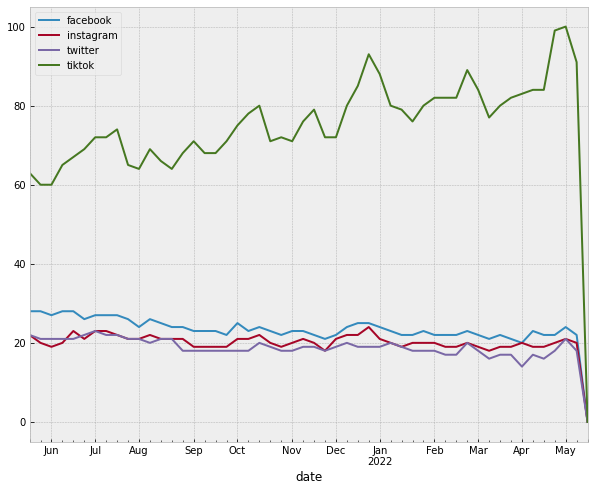

In [105]:
data.plot(figsize = (10, 8))


grafik diatas menggambarkan keywords sosial media yang dicari di indonesia pada 1 tahun terakhir. Dengan grafik tersebut, kita dapat membaca dan mengetahui sosial media yang paling populer dan paling banyak digunakan di indonesia. nilai pada sumbu y merupakan nilai interest atau nilai ketertarikan user pada keywords tersebut yang mana data tersebut didapat dengan mengambil data pencarian di google trends.

Text(0, 0.5, 'Total Count')

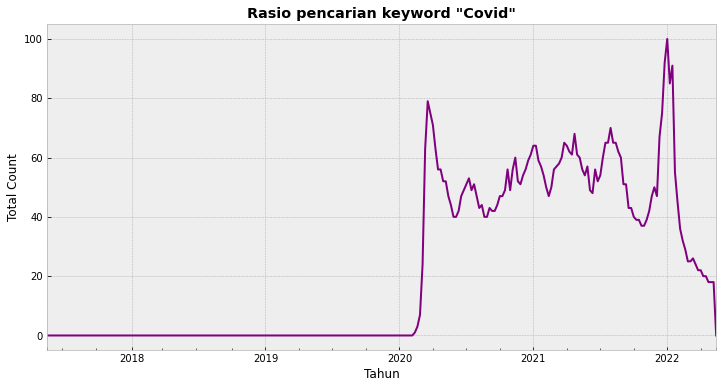

In [114]:
plt.style.use('bmh')


# melakukan koneksi ke google
pytrends = TrendReq(hl='id-ID')
# keywords yang akan dicari
pytrends.build_payload(kw_list=['covid'])

# dataframe
time_df = pytrends.interest_over_time()

# Grafik
fig, ax = plt.subplots(figsize=(12, 6))
time_df['covid'].plot(color='purple')
# Judul dan label
plt.title('Rasio pencarian keyword "Covid"', fontweight='bold')
plt.xlabel('Tahun')
plt.ylabel('Total Count')

gambar diatas merupakan gambar visualisasi tingkat pencarian dengan kata kunci "covid". bisa dilihat dari grafik tersebut pencarian kata kunci covid melonjak drastis pada awal tahun 2020. karena pada saaat itu munculnya kasus pertama covid di indonesia. lalu setelah nya tingkat pencarian dari data tersebut mengalami kenaikan dan penurunan. lalu pada awal tahun 2022, pencarian dengan kata kunci covid kembali naik drastis karena adanya gelombang 2 covid.